In [38]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_selection import mutual_info_classif

In [22]:
# Loadig dataset

PATH = 'C:\\Users\\josep\\OneDrive\\Desktop\\Capstone\\Jupyter\\Dataset\\'
Dataset = pd.read_csv(PATH + 'dc_combined.csv')

In [23]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 98 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Seq                     1215675 non-null  int64  
 1   Dur                     1215675 non-null  float64
 2   RunTime                 1215675 non-null  float64
 3   Mean                    1215675 non-null  float64
 4   Sum                     1215675 non-null  float64
 5   Min                     1215675 non-null  float64
 6   Max                     1215675 non-null  float64
 7   sTos                    1215675 non-null  float64
 8   dTos                    1215675 non-null  float64
 9   sTtl                    1215675 non-null  float64
 10  dTtl                    1215675 non-null  float64
 11  sHops                   1215675 non-null  float64
 12  dHops                   1215675 non-null  float64
 13  TotPkts                 1215675 non-null  int64  
 14  Sr

In [24]:
# Finding and removing columns with type "object"

def find_and_remove_columns_with_type_object(data):
    objectData = data.select_dtypes(include=[object])
    objectColumns=list(objectData.columns)
    print(objectColumns)
    new_data = data.drop(columns=objectColumns, inplace=False)
    return new_data

In [25]:
X = find_and_remove_columns_with_type_object(Dataset)

['Label', 'Attack Type', 'Attack Tool']


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 95 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   Seq                     1215675 non-null  int64  
 1   Dur                     1215675 non-null  float64
 2   RunTime                 1215675 non-null  float64
 3   Mean                    1215675 non-null  float64
 4   Sum                     1215675 non-null  float64
 5   Min                     1215675 non-null  float64
 6   Max                     1215675 non-null  float64
 7   sTos                    1215675 non-null  float64
 8   dTos                    1215675 non-null  float64
 9   sTtl                    1215675 non-null  float64
 10  dTtl                    1215675 non-null  float64
 11  sHops                   1215675 non-null  float64
 12  dHops                   1215675 non-null  float64
 13  TotPkts                 1215675 non-null  int64  
 14  Sr

In [27]:
def remove_attack_and_seq_labels(data):
    X =  data.loc[:,~data.columns.str.startswith('Atk')]
    X =  X.loc[:,~X.columns.str.startswith('Attack')]
    X =  X.loc[:,~X.columns.str.startswith('Label_')]
    # X = X.drop(['Label', 'Seq'], axis=1)
    X = X.drop(['Seq'], axis=1)
    return X

In [28]:
X = remove_attack_and_seq_labels(X)

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 77 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Dur              1215675 non-null  float64
 1   RunTime          1215675 non-null  float64
 2   Mean             1215675 non-null  float64
 3   Sum              1215675 non-null  float64
 4   Min              1215675 non-null  float64
 5   Max              1215675 non-null  float64
 6   sTos             1215675 non-null  float64
 7   dTos             1215675 non-null  float64
 8   sTtl             1215675 non-null  float64
 9   dTtl             1215675 non-null  float64
 10  sHops            1215675 non-null  float64
 11  dHops            1215675 non-null  float64
 12  TotPkts          1215675 non-null  int64  
 13  SrcPkts          1215675 non-null  int64  
 14  DstPkts          1215675 non-null  int64  
 15  TotBytes         1215675 non-null  int64  
 16  SrcBytes         1

In [32]:
def label_encoder(data, column_name):
  Y = data[column_name]
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(Y)
  return y_encoded

In [35]:
Y = label_encoder(Dataset, 'Label')

In [36]:
def mutual_info(X, Y):
  mutual_info_arr = mutual_info_classif(X, Y)
  series_info = pd.Series(mutual_info_arr)
  series_info.index = X.columns
  series_top = series_info.sort_values(ascending=False)[:20]
  return series_top

In [39]:
result = mutual_info(X, Y)

<Axes: >

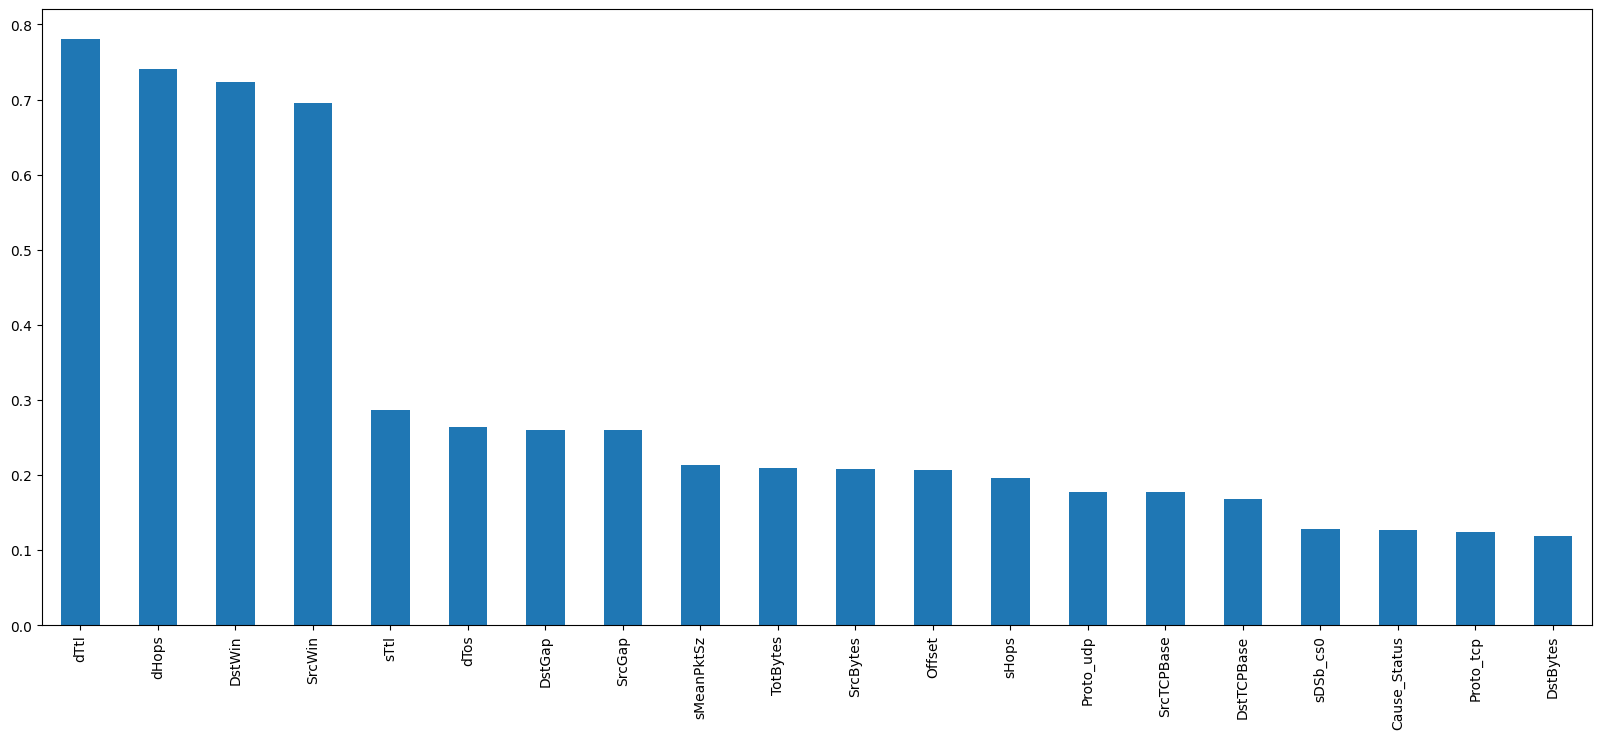

In [40]:
result.plot.bar(figsize=(20,8))

In [42]:
new_data = Dataset[result.keys()]

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215675 entries, 0 to 1215674
Data columns (total 20 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   dTtl          1215675 non-null  float64
 1   dHops         1215675 non-null  float64
 2   DstWin        1215675 non-null  float64
 3   SrcWin        1215675 non-null  float64
 4   sTtl          1215675 non-null  float64
 5   dTos          1215675 non-null  float64
 6   DstGap        1215675 non-null  float64
 7   SrcGap        1215675 non-null  float64
 8   sMeanPktSz    1215675 non-null  float64
 9   TotBytes      1215675 non-null  int64  
 10  SrcBytes      1215675 non-null  int64  
 11  Offset        1215675 non-null  int64  
 12  sHops         1215675 non-null  float64
 13  Proto_udp     1215675 non-null  int64  
 14  SrcTCPBase    1215675 non-null  float64
 15  DstTCPBase    1215675 non-null  float64
 16  sDSb_cs0      1215675 non-null  int64  
 17  Cause_Status  1215675 non-n

In [ ]:
df = df.drop(columns=['AtkTool_Benign', 'AtkTool_Goldeneye', 'AtkTool_Hping3', 'AtkTool_Nmap', 'AtkTool_Slowloris', 'AtkTool_Torshammer', 'AtkType_Benign', 'AtkType_HTTPFlood', 'AtkType_ICMPFlood',
                 'AtkType_SYNFlood', 'AtkType_SYNScan', 'AtkType_SlowrateDoS', 'AtkType_TCPConnectScan', 'AtkType_UDPFlood', 'AtkType_UDPScan', 'Label_Malicious'])

In [ ]:
df.info()

In [ ]:
X = df.drop(columns=['Label_Benign'])

In [ ]:
Y = df['Label_Benign']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
# Trying SVC
clf = SVC()
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)

In [ ]:
print("Accuracy Score (training) for Decision Tree:{0:6f}".format(metrics.accuracy_score(Y_train,clf_predict)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_train, clf_predict))

In [ ]:
# trying LinearSVC
clf = LinearSVC()
clf.fit(X_train, Y_train)
clf_predict = clf.predict(X_test)
clf_train_predict = clf.predict(X_train)

In [ ]:
print("Accuracy Score (training) for Decision Tree: {:.6f}".format(metrics.accuracy_score(Y_train, clf_train_predict)))
print("Confusion Matrix for Decision Tree (training):")
print(confusion_matrix(Y_train, clf_train_predict))

In [ ]:
print("Accuracy Score (test) for Decision Tree: {:.6f}".format(metrics.accuracy_score(Y_test, clf_predict)))
print("Confusion Matrix for Decision Tree (test):")
print(confusion_matrix(Y_test, clf_predict))